# Optimización de Ingresos: Priorización Estratégica y Validación Estadística de un Test A/B en E-commerce

### Este proyecto aborda la mejora de ingresos en una plataforma de comercio electrónico mediante dos tareas clave.

### Primero, se utiliza la metodología RICE/ICE para priorizar nueve hipótesis de crecimiento, asegurando que los recursos se inviertan en las iniciativas de mayor impacto potencial.
### Segundo, se realiza un análisis estadístico detallado de un Test A/B ya ejecutado. Este análisis incluye la exploración de métricas acumuladas, la detección y tratamiento de anomalías, y el cálculo de la significancia estadística para la conversión y el tamaño de pedido.

### El objetivo final es proporcionar una recomendación basada en datos para finalizar el experimento y escalar la solución ganadora.

## Paso 1. Preparación de Datos.

## Comprensión y exploración de datos EDA.

### 1.1 DataFrame Hypotheses

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar opciones de visualización para mostrar el contenido completo de la columna 'Hypothesis'
pd.set_option('display.max_colwidth', None)

# Cargamos el dataset
hypotheses = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyecto_sprint_10/hypotheses_us.csv', sep=';')

# Exploramos los tipos de datos y su contenido.
print("--- Información General y Tipos de Datos ---")
hypotheses.info()
print('----------------------------------------------------------------------')
print("\n--- Contenido del DataFrame ---")
display(hypotheses)

--- Información General y Tipos de Datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
----------------------------------------------------------------------

--- Contenido del DataFrame ---


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [3]:
# ------- Preprocesamiento de los datos y limpieza------

# Convertir todos los nombres de columnas a minúsculas
hypotheses.columns = hypotheses.columns.str.lower()

# Eliminar espacios en blanco al inicio y al final de los nombres de las columnas
hypotheses.columns = hypotheses.columns.str.strip()

# Revisamos los cambios.
hypotheses.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


### 1.2 DataFrame Orders

In [4]:
# Cargamos el dataset de órdenes
orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyecto_sprint_10/orders_us.csv', sep=',')

# Exploramos los tipos de datos y su contenido inicial
print("--- Información General y Tipos de Datos ---")
orders.info()
print('----------------------------------------------------------------------')
print("\n--- Primeras filas del DataFrame Orders ---")
display(orders.head())

--- Información General y Tipos de Datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
----------------------------------------------------------------------

--- Primeras filas del DataFrame Orders ---


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [5]:
# Convertir todos los nombres de columnas a minúsculas
orders.columns = orders.columns.str.lower()

# Convertir la columna 'date' a tipo datetime
orders['date'] = pd.to_datetime(orders['date'])

# Verificar los tipos de datos después de la conversión
print("--- Nombres y Tipos de datos después de convertir la columna 'date' ---")
orders.info()

--- Nombres y Tipos de datos después de convertir la columna 'date' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


### 1.2 DataFrame Visits

In [6]:
# Cargamos el dataset de visitas
visits = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/proyecto_sprint_10/visits_us.csv', sep=',')

# Exploramos los tipos de datos y su contenido inicial
print("--- Información General y Tipos de Datos ---")
visits.info()
print('----------------------------------------------------------------------')
print("\n--- Primeras filas del DataFrame Visits ---")
display(visits.head())

--- Información General y Tipos de Datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
----------------------------------------------------------------------

--- Primeras filas del DataFrame Visits ---


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
# Convertir la columna 'date' a tipo datetime
visits['date'] = pd.to_datetime(visits['date'])

# Verificar los tipos de datos después de la conversión
print("--- Tipos de datos después de convertir la columna 'date' ---")
visits.info()

--- Tipos de datos después de convertir la columna 'date' ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### 1.3 Busqueda de duplicados e inconsistencias.

In [8]:
# Verificamos si hay filas completamente duplicadas en el DataFrame orders
duplicate_orders = orders[orders.duplicated()]

print("--- Filas completamente duplicadas en el DataFrame orders ---")
display(duplicate_orders)
print(f"\nNúmero de filas completamente duplicadas en orders: {duplicate_orders.shape[0]}")
print('----------------------------------------------------------------------')

# Verificamos si hay filas completamente duplicadas en el DataFrame visits
duplicate_visits = visits[visits.duplicated()]

print("\n--- Filas completamente duplicadas en el DataFrame visits ---")
display(duplicate_visits)
print(f"\nNúmero de filas completamente duplicadas en visits: {duplicate_visits.shape[0]}")

--- Filas completamente duplicadas en el DataFrame orders ---


,transactionid,visitorid,date,revenue,group



Número de filas completamente duplicadas en orders: 0
----------------------------------------------------------------------

--- Filas completamente duplicadas en el DataFrame visits ---


,date,group,visits



Número de filas completamente duplicadas en visits: 0


In [9]:
# Encontramos usuarios que están en ambos grupos (A y B)
visitors_in_both_groups = orders.groupby('visitorid')['group'].nunique() > 1
visitors_in_both_groups = visitors_in_both_groups[visitors_in_both_groups].index

print("--- Usuarios presentes en ambos grupos (A y B) ---")
print(visitors_in_both_groups)
print(f"\nNúmero de usuarios en ambos grupos: {len(visitors_in_both_groups)}")
print('----------------------------------------------------------------------')

# Mostramos las filas correspondientes a estos usuarios en el DataFrame orders
if len(visitors_in_both_groups) > 0:
    print("\n--- Detalles de los pedidos de usuarios en ambos grupos ---")
    display(orders[orders['visitorid'].isin(visitors_in_both_groups)].sort_values(by=['visitorid', 'date']))

--- Usuarios presentes en ambos grupos (A y B) ---
Index([   8300375,  199603092,  232979603,  237748145,  276558944,  351125977,
        393266494,  457167155,  471551937,  477780734,  818047933,  963407295,
       1230306981, 1294878855, 1316129916, 1333886533, 1404934699, 1602967004,
       1614305549, 1648269707, 1668030113, 1738359350, 1801183820, 1959144690,
       2038680547, 2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286, 2780786433,
       2927087541, 2949041841, 2954449915, 3062433592, 3202540741, 3234906277,
       3656415546, 3717692402, 3766097110, 3803269165, 3891541246, 3941795274,
       3951559397, 3957174400, 3963646447, 3972127743, 3984495233, 4069496402,
       4120364173, 4186807279, 4256040402, 4266935830],
      dtype='int64', name='visitorid')

Número de usuarios en ambos grupos: 58
----------------------------------------------------------------------

--- Detalles de los pedidos de 

,transactionid,visitorid,date,revenue,group
71,3679129301,8300375,2019-08-01,165.7,B
703,4293855558,8300375,2019-08-07,30.5,A
246,437656952,199603092,2019-08-02,55.7,B
1102,1941707234,199603092,2019-08-12,100.0,A
26,2223239646,199603092,2019-08-15,55.7,A
...,...,...,...,...,...
901,3402467119,4256040402,2019-08-27,30.1,A
1018,1415970216,4256040402,2019-08-31,80.5,A
1019,453824282,4256040402,2019-08-31,30.5,B
662,1811671147,4266935830,2019-08-29,1220.2,A


### 1.4 Eliminamos los usuarios repetidos en ambos grupos.

In [10]:
# Creamos una lista de los visitorid a eliminar.
visitors_to_remove = visitors_in_both_groups

# Eliminamos los pedidos de estos usuarios del DataFrame orders
orders_filtered = orders[~orders['visitorid'].isin(visitors_to_remove)]

# Verificamos el tamaño de los DataFrames después de la eliminación
print(f"Número de filas en orders antes de filtrar: {orders.shape[0]}")
print(f"Número de filas en orders después de filtrar: {orders_filtered.shape[0]}")

# En el caso de visits, como no filtramos por visitorid, el número de filas sigue siendo el mismo.
print(f"Número de filas en visits: {visits.shape[0]}")

# Ahora usaremos orders_filtered para el análisis del Test A/B.

Número de filas en orders antes de filtrar: 1197
Número de filas en orders después de filtrar: 1016
Número de filas en visits: 62


### 1.5 Observaciónes de la eliminación:

#### Al eliminar todas las actividades de estos usuarios, nos aseguramos de que los datos restantes representen la actividad real de usuarios que fueron asignados correctamente a un único grupo.
#### De esta forma, las métricas que calculemos como la tasa de conversión o el tamaño de pedido promedio, reflejarán de forma más precisa el impacto de la variante a la que cada grupo fue expuesto, esto nos permite una comparación justa y un análisis estadístico más confiable.

#### Aunque perdamos esos 181 pedidos del análisis, la ganancia para nosotros es tener un conjunto de datos limpio que nos permita confiar en los resultados del Test A/B y tomar decisiones correctas basadas en ellos.

## Paso 2) Priorizar hipótesis

## 2.1 Priorizar Hipótesis utilizando Frameworks ICE y RICE

In [11]:
# Calculamos la puntuación ICE para cada hipótesis
# Fórmula para ICE = (Impact * Confidence) / Effort
hypotheses['ice'] = (hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

# Calcular la puntuación RICE para cada hipótesis
# Fórmula para RICE = (Reach * Impact * Confidence) / Effort
hypotheses['rice'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

# Mostrar las hipótesis ordenadas por ICE de forma descendente
print("--- Hipótesis priorizadas por Framework ICE ---")
display(hypotheses[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

print('----------------------------------------------------------------------')

# Mostrar las hipótesis ordenadas por RICE de forma descendente
print("\n--- Hipótesis priorizadas por Framework RICE ---")
display(hypotheses[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

--- Hipótesis priorizadas por Framework ICE ---


,hypothesis,ice
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


----------------------------------------------------------------------

--- Hipótesis priorizadas por Framework RICE ---


,hypothesis,rice
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


In [12]:
# Ajustamos opciones de visualización para mostrar el contenido completo de la columna 'hypothesis'
pd.set_option('display.max_colwidth', 100)

# Creamos un Dataframe consolidado con ambos rankings
comparison = hypotheses[['hypothesis', 'ice', 'rice']].sort_values(by='rice', ascending=False)
comparison = comparison.set_index('hypothesis')

# Ordenar por ICE para la visualización de la comparación
ice_rank = comparison.sort_values(by='ice', ascending=False).reset_index()
ice_rank['ice_rank'] = ice_rank.index + 1
rice_rank = comparison.sort_values(by='rice', ascending=False).reset_index()
rice_rank['rice_rank'] = rice_rank.index + 1

# Consolidar y mostrar
final_comparison = pd.merge(ice_rank[['hypothesis', 'ice_rank', 'ice']],
                           rice_rank[['hypothesis', 'rice_rank', 'rice']],
                           on='hypothesis')

# Mostrar el resultado final, ordenado por la clasificación RICE (la más completa)
final_comparison = final_comparison.sort_values(by='rice_rank')
print("\n--- 4.1. Comparación Final de Ranking (Ordenado por RICE) ---")
display(final_comparison[['hypothesis', 'ice_rank', 'rice_rank', 'ice', 'rice']])


--- 4.1. Comparación Final de Ranking (Ordenado por RICE) ---


,hypothesis,ice_rank,rice_rank,ice,rice
2,Add a subscription form to all the main pages. This will help you compile a mailing list,3,1,11.200000,112.0
4,Add product recommendation blocks to the store's site. This will increase conversion and average...,5,2,7.000000,56.0
1,Add two new channels for attracting traffic. This will bring 30% more users,2,3,13.333333,40.0
3,Show banners with current offers and sales on the main page. This will boost conversion,4,4,8.000000,40.0
0,Launch a promotion that gives users discounts on their birthdays,1,5,16.200000,16.2
7,Change the category structure. This will increase conversion since users will find the products ...,8,6,1.125000,9.0
5,Launch your own delivery service. This will shorten delivery time,6,7,2.000000,4.0
6,Add a customer review page. This will increase the number of orders,7,8,1.333333,4.0
8,Change the background color on the main page. This will increase user engagement,9,9,1.000000,3.0


### 2.2 Graficamos para una idea visual

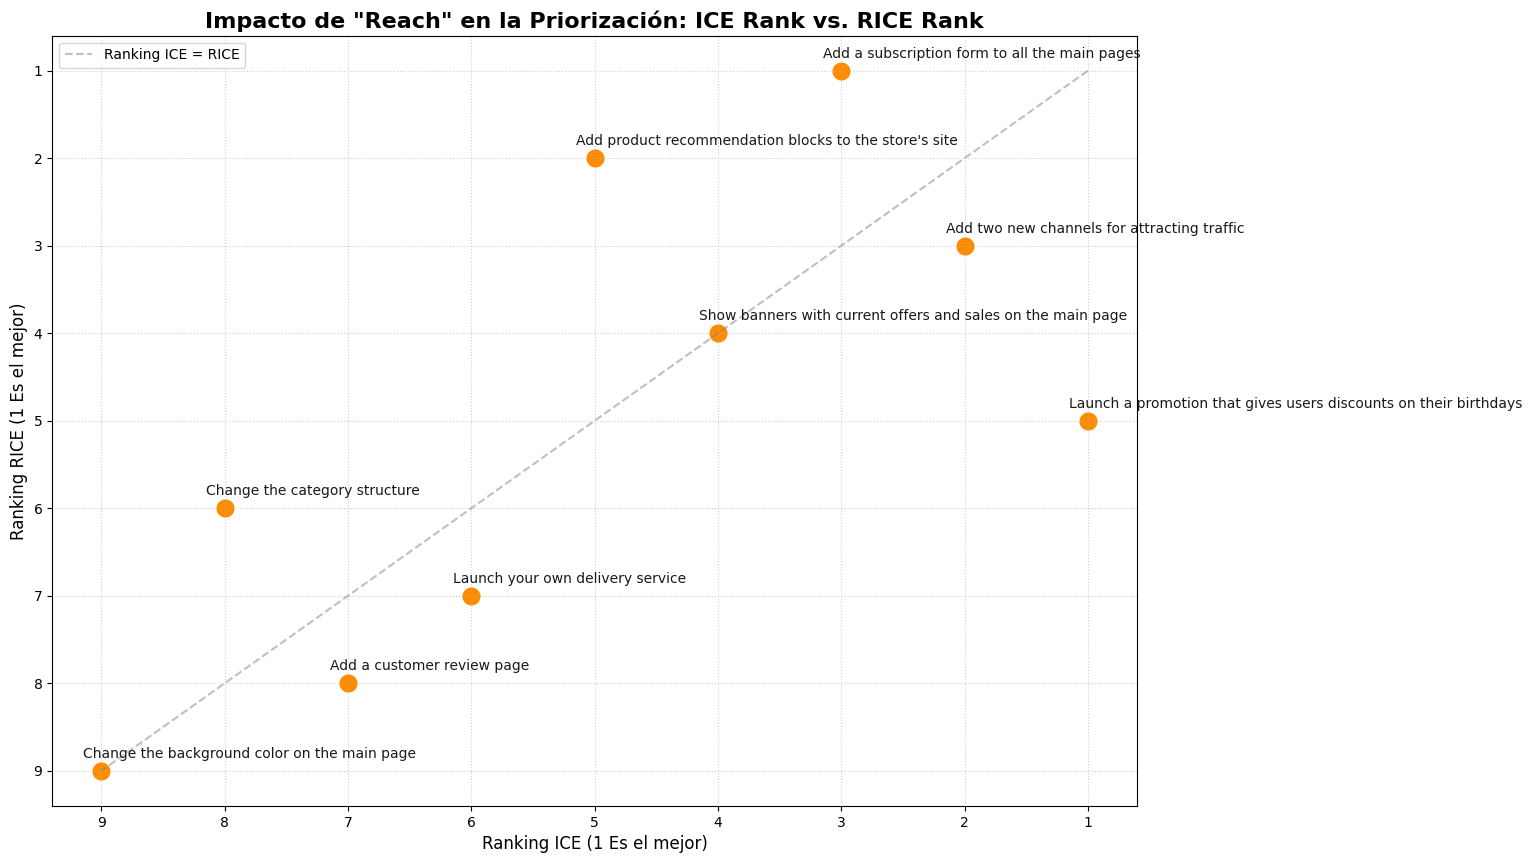

In [13]:
# Preparación del DataFrame para visualización
# Aseguramos que la columna 'hypothesis' sea de tipo string para el gráfico
final_comparison['hypothesis'] = final_comparison['hypothesis'].astype(str)

# Configuración del gráfico.
plt.figure(figsize=(14, 10)) # Aumentar aún más el tamaño de la figura
sns.scatterplot(
    data=final_comparison,
    x='ice_rank',
    y='rice_rank',
    color='darkorange',
    s=200 # Tamaño de los puntos
)

# Añadimos etiquetas de las hipótesis para explicar el movimiento
for i, row in final_comparison.iterrows():
    # Usamos una versión corta de la hipótesis para la etiqueta
    short_hypo = row['hypothesis'].split('.')[0]
    # Ajustamos ligeramente la posición del texto
    plt.annotate(
        short_hypo,
        (row['ice_rank'] + 0.15, row['rice_rank'] - 0.15), # Ajuste de posición
        fontsize=10,
        alpha=0.9
    )

# Dibujamos una línea de igualdad (donde ICE Rank == RICE Rank)
plt.plot([1, 9], [1, 9], linestyle='--', color='gray', alpha=0.5, label='Ranking ICE = RICE')

plt.title('Impacto de "Reach" en la Priorización: ICE Rank vs. RICE Rank', fontsize=16, fontweight='bold')
plt.xlabel('Ranking ICE (1 Es el mejor)', fontsize=12)
plt.ylabel('Ranking RICE (1 Es el mejor)', fontsize=12)
plt.gca().invert_xaxis() # El ranking 1 debe estar a la izquierda
plt.gca().invert_yaxis() # El ranking 1 debe estar arriba
plt.grid(True, linestyle=':', alpha=0.6)
plt.xticks(range(1, 10))
plt.yticks(range(1, 10))
plt.legend()
plt.show()

### 2.3 Gráfico de comparación de puntuaciones absolutas ICE vs RICE

/tmp/ipython-input-4078240159.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


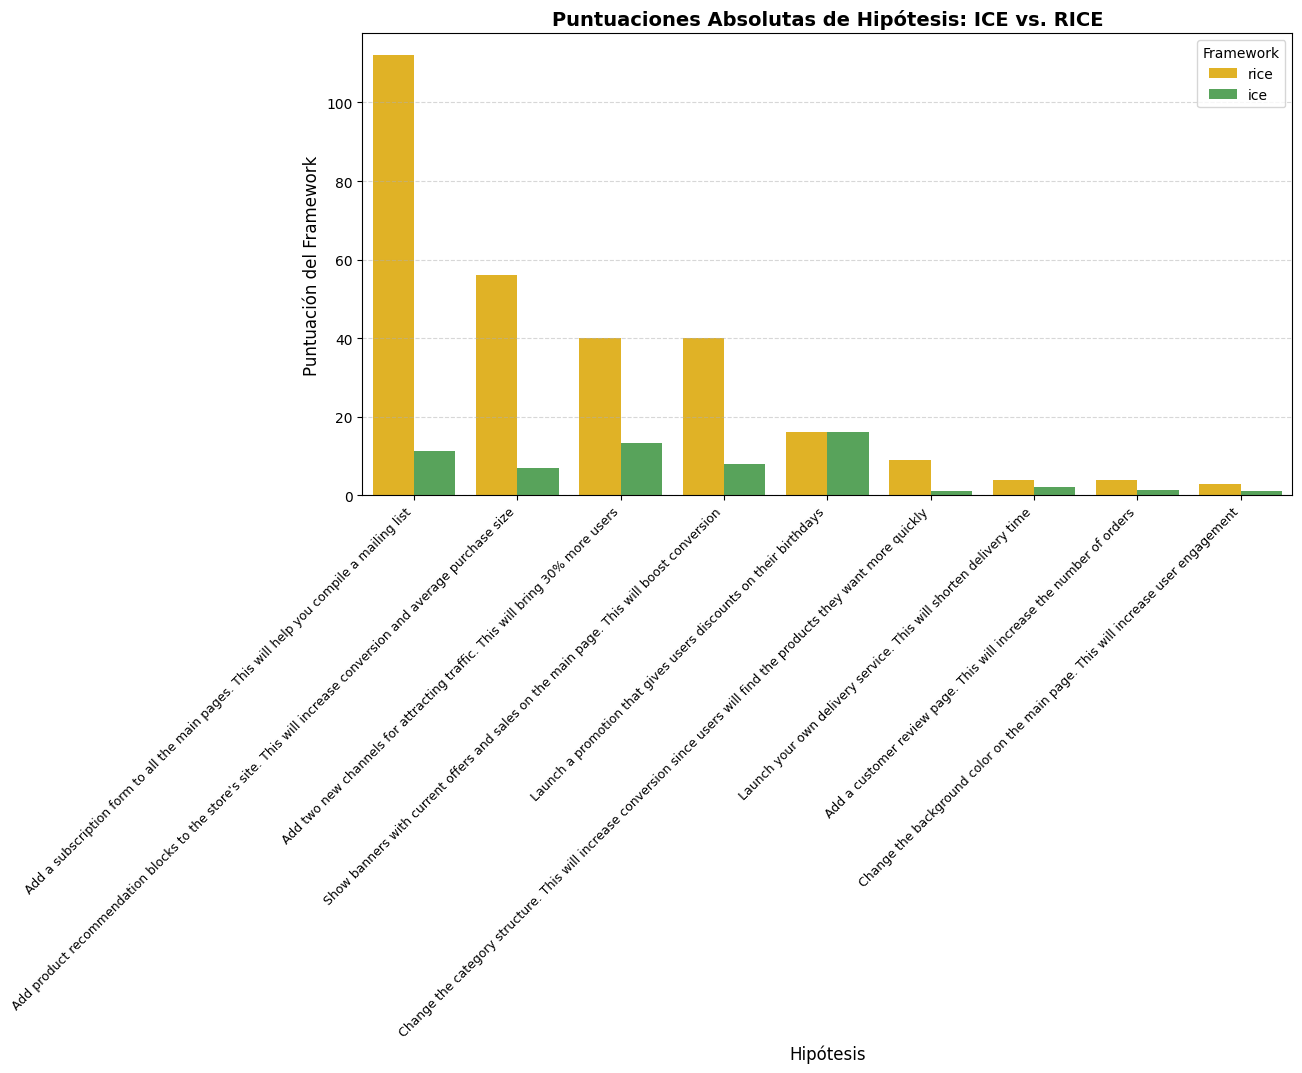

In [14]:
# Reutilizamos el dataframe 'final_comparison' que contiene 'hypothesis', 'ice' y 'rice'
# Preparamos los datos para un gráfico de barras agrupado.
plot_data = final_comparison[['hypothesis', 'ice', 'rice']].melt(
    id_vars='hypothesis', var_name='Framework', value_name='Score'
)

# Configuración del gráfico
plt.figure(figsize=(12, 6))
sns.barplot(
    data=plot_data.sort_values(by='Score', ascending=False), # Ordenamos por puntuación para mejor visualización
    x='hypothesis',
    y='Score',
    hue='Framework',
    palette={'ice': '#4CAF50', 'rice': '#FFC107'} # Paleta de colores distintiva
)

# Etiquetas y Títulos
plt.title('Puntuaciones Absolutas de Hipótesis: ICE vs. RICE', fontsize=14, fontweight='bold')
plt.xlabel('Hipótesis', fontsize=12)
plt.ylabel('Puntuación del Framework', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9) # Rotar para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 2.4 Observaciónes de la comparación:

##### Es interesante como puede cambiar drasticamente la prioridad que se le da a una hipótesis. Por ejemplo:

##### En el caso de la hipótesis "Launch a promotion that gives users discounts on their birthdays", aunque tiene un 'Impact' y una 'Confidence' muy altos, su 'Reach' es muy bajo solo 1.
##### Por eso, al incluir el 'Reach' en RICE, su puntuación baja considerablemente y su prioridad disminuye.
##### Por otro lado, las hipótesis como "Add a subscription form to all the main pages..." Reach = 10 o "Add product recommendation blocks..." Reach = 8 tienen puntuaciones de mucho más altas. Quiere decir que impactarán a una porción mucho mayor de personas. Aunque su 'Impact' pueda no ser tan alto como el de la promoción de cumpleaños, el hecho de que llegarán a muchos más usuarios eleva significativamente su puntuación RICE y, por lo tanto, su prioridad.

#### Conclusión de la Priorización:

##### Mientras que ICE se enfoca en el impacto, la confianza y el esfuerzo, RICE considera además el alcance. Esto hace que RICE sea un framework más completo para priorizar iniciativas en productos digitales, ya que una mejora que afecte a pocos usuarios puede no generar tanto valor general como una mejora con un impacto moderado pero que llegue a más cantidad de usuarios.

##### Basándonos RICE, las hipótesis principales a priorizar serían:

##### 1) Add a subscription form to all the main pages... (RICE: 112)
##### 2) Add product recommendation blocks... (RICE: 56)
##### 3) Add two new channels for attracting traffic. (RICE: 40) - Empata con:
##### Show banners with current offers and sales... (RICE: 40) - Empate con la anterior.

##### Estas son las hipótesis que tienen el mayor potencial de generar un impacto significativo debido a una buena combinación de alcance, impacto y confianza, junto con un esfuerzo razonable.

## Paso 3) Análisis del test A/B

In [18]:
# Asegurarnos de que los DataFrames estén ordenados por fecha
orders_filtered = orders_filtered.sort_values(by=['date'])
visits = visits.sort_values(by=['date'])

# Calculamos el número diario de pedidos y los ingresos diarios por grupo
daily_orders = orders_filtered.groupby(['date', 'group']).agg(
    orders_count=('transactionid', 'nunique'),
    revenue=('revenue', 'sum')
).reset_index()

# Combinamos los datos de visitas con los datos diarios de pedidos e ingresos
cumulative_data = pd.merge(daily_orders, visits, on=['date', 'group'])

# Asegurarnos de que estén ordenados por fecha y grupo para el cálculo acumulado
cumulative_data = cumulative_data.sort_values(by=['group', 'date'])

# Calculamos las métricas acumuladas
cumulative_data['cumulative_orders'] = cumulative_data.groupby('group')['orders_count'].cumsum()
cumulative_data['cumulative_revenue'] = cumulative_data.groupby('group')['revenue'].cumsum()
cumulative_data['cumulative_visits'] = cumulative_data.groupby('group')['visits'].cumsum()

# Calculamos el tamaño de pedido promedio acumulado
cumulative_data['cumulative_average_order_size'] = cumulative_data['cumulative_revenue'] / cumulative_data['cumulative_orders']

# Mostramos las primeras filas del DataFrame acumulado
print("--- Datos Acumulados Diarios por Grupo ---")
display(cumulative_data.head())

--- Datos Acumulados Diarios por Grupo ---


,date,group,orders_count,revenue,visits,cumulative_orders,cumulative_revenue,cumulative_visits,cumulative_average_order_size
0,2019-08-01,A,23,2266.6,719,23,2266.6,719,98.547826
2,2019-08-02,A,19,1468.3,619,42,3734.9,1338,88.926190
4,2019-08-03,A,24,1815.2,507,66,5550.1,1845,84.092424
6,2019-08-04,A,11,675.5,717,77,6225.6,2562,80.851948
8,2019-08-05,A,22,1398.0,756,99,7623.6,3318,77.006061


### 3.1 Gráfico del ingreso acumulado por grupo.

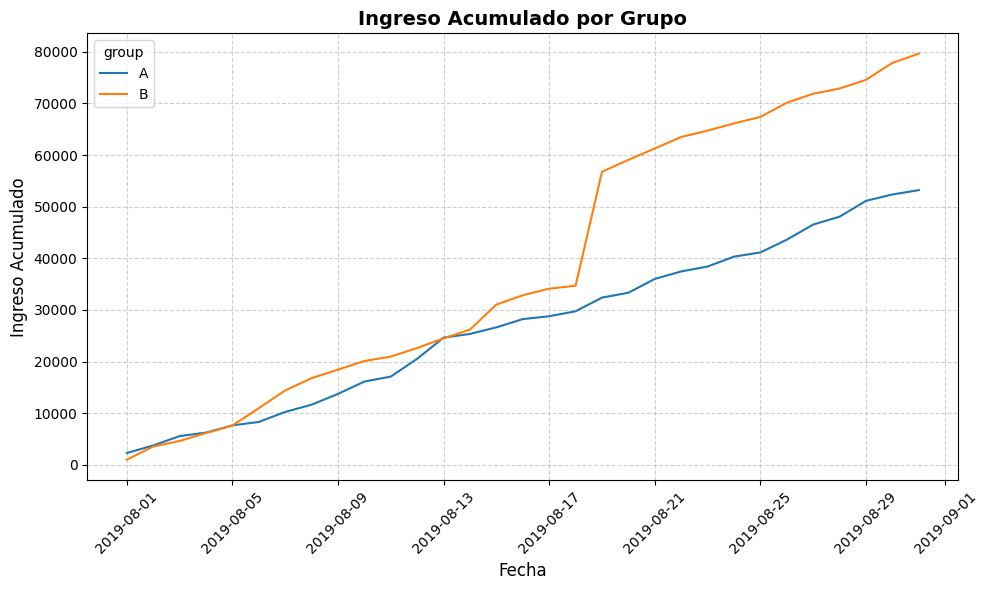

In [19]:
# ---Gráfico del ingreso acumulado por grupo----
plt.figure(figsize=(10, 6))
sns.lineplot(data=cumulative_data, x='date', y='cumulative_revenue', hue='group')
plt.title('Ingreso Acumulado por Grupo', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ingreso Acumulado', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observaciones:

#### Tendencia General: Ambos grupos muestran una tendencia ascendente en el ingreso acumulado a lo largo del tiempo, lo cual es esperado ya que se siguen agregando pedidos.

#### Grupo B Lidera en Ingreso Acumulado: Desde el principio, el Grupo B ha mostrado un ingreso acumulado consistentemente mayor que el Grupo A. La brecha entre los dos grupos parece aumentar con el tiempo.
#### Picos o Saltos en el Ingreso: Se observan algunos puntos en los que el ingreso acumulado del Grupo B parece dar un salto más pronunciado que el del Grupo A. Esto podría indicar la presencia de pedidos de alto valor en el Grupo B en esos días, o quizás un aumento inusual en el número de pedidos. Estos saltos son los que contribuyen a que la diferencia entre los grupos se amplíe.

#### Conclusión general:
#### El gráfico indica una clara ventaja en el ingreso acumulado para el Grupo B, pero el salto repentino el 18 de agosto es una fuerte señal de anomalía (outlier). Se necesitará un análisis estadístico filtrado para determinar si esta ventaja es real y sostenible, o si solo fue impulsada por uno o dos pedidos de precios inflados.

### 3.2 Gráfico del tamaño de pedido promedio acumulado por grupo.

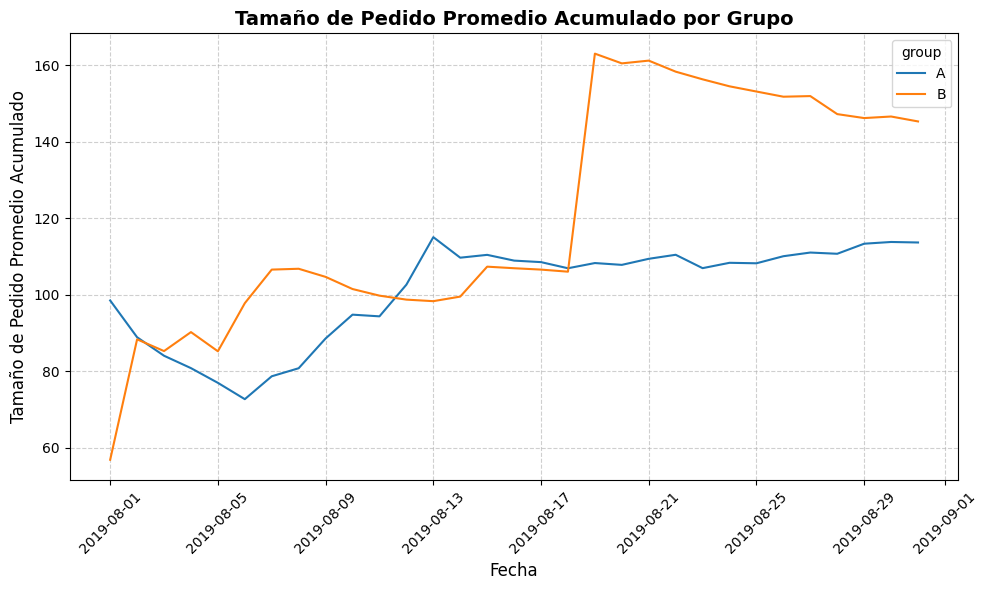

In [20]:
# ---Gráfico del tamaño de pedido promedio acumulado por grupo---
plt.figure(figsize=(10, 6))
sns.lineplot(data=cumulative_data, x='date', y='cumulative_average_order_size', hue='group')
plt.title('Tamaño de Pedido Promedio Acumulado por Grupo', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Tamaño de Pedido Promedio Acumulado', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observaciones:
#### Al principio del Test, el tamaño de pedido promedio acumulado para ambos grupos muestra bastante volatilidad. Esto puede ser normal, porque con un número pequeño de pedidos, uno o dos pedidos de valor alto o bajo pueden influir bastante en el promedio acumulado. Después de la fase inicial, las líneas de los grupos A y B empiezan a separarse. La línea del Grupo B generalmente se mantiene por encima de la del Grupo A, indicando un tamaño de pedido promedio acumulado mayor.

#### Vemos un salto Significativo en el Grupo B: Similar a lo que vimos en el gráfico de ingreso acumulado, hay un salto muy pronunciado en el tamaño de pedido promedio acumulado del Grupo B alrededor del 18 de agosto. Esto refuerza la sospecha de que hubo uno o varios pedidos de muy alto valor en el Grupo B en esa fecha, lo cual está inflando el promedio.

#### Este gráfico es una evidencia clara de la necesidad de investigar y posiblemente tratar los valores atípicos antes de sacar conclusiones definitivas

### 3.3 Gráfico de la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A.

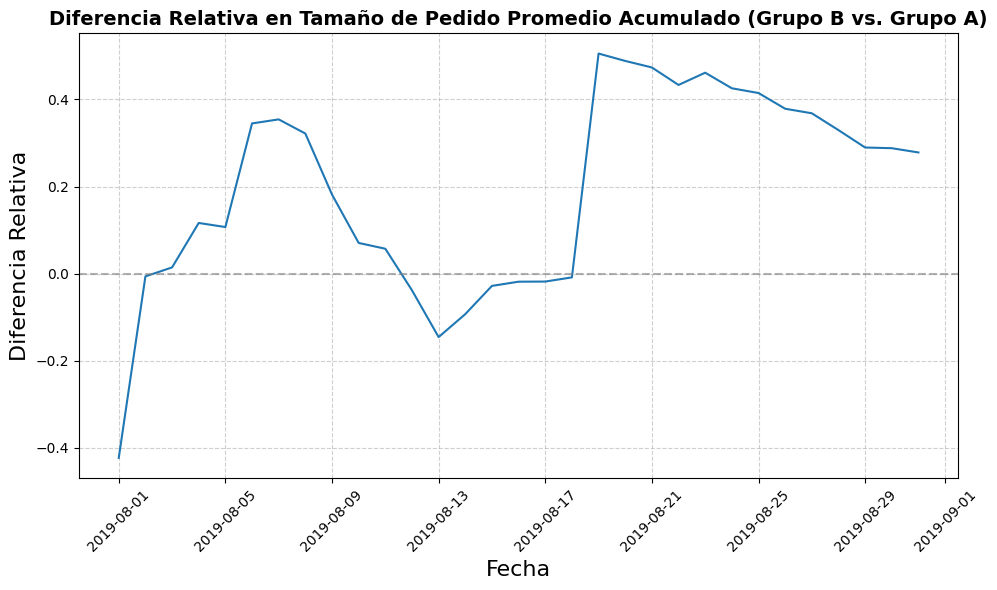

In [23]:
# Obtener los datos acumulados para cada grupo
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'cumulative_revenue', 'cumulative_orders', 'cumulative_average_order_size']]
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'cumulative_revenue', 'cumulative_orders', 'cumulative_average_order_size']]

# Combinar los datos acumulados de ambos grupos en un solo DataFrame por fecha
merged_cumulative_data = pd.merge(cumulative_revenue_a, cumulative_revenue_b, on='date', suffixes=['_A', '_B'])

# Calcular la diferencia relativa en el tamaño de pedido promedio acumulado
# Diferencia Relativa = ((Promedio B - Promedio A) / Promedio A) * 100
merged_cumulative_data['relative_average_order_size_difference'] = (
    (merged_cumulative_data['cumulative_average_order_size_B'] / merged_cumulative_data['cumulative_average_order_size_A']) - 1
)

# Gráfico de la diferencia relativa en el tamaño de pedido promedio acumulado
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_cumulative_data, x='date', y='relative_average_order_size_difference')
plt.title('Diferencia Relativa en Tamaño de Pedido Promedio Acumulado (Grupo B vs. Grupo A)', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=16)
plt.ylabel('Diferencia Relativa', fontsize=16)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.6) # Línea en 0 para referencia
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observaciónes:

#### Después de la fase inicial, la línea se mueve consistentemente por encima del cero, indicando que el tamaño de pedido promedio acumulado del Grupo B es mayor que el del Grupo A.

#### Impacto del Outlier: Se observa un salto muy pronunciado y sostenido en la diferencia relativa alrededor del 18 de agosto. Este es el mismo punto que identificamos como un posible outlier en los gráficos anteriores. Este salto eleva drásticamente la diferencia relativa y la mantiene en un nivel alto.

#### El gráfico confirma visualmente que el Grupo B ha tenido un tamaño de pedido promedio acumulado consistentemente mayor que el Grupo A durante la mayor parte del experimento. El salto pronunciado en el gráfico refuerza la probabilidad de la existencia de outliers de ingresos significativos en el Grupo B, los cuales están inflando el tamaño de pedido promedio y la diferencia relativa.

#### La estabilización en un nivel alto podría ser engañosa si está siendo impulsada principalmente por esos outliers. Es probable que sin esos valores extremos la diferencia relativa sea menor y quizás no estadísticamente significativa.

#### Este gráfico recalca aún más la necesidad de identificar y posiblemente eliminar los outliers antes de realizar los análisis de significancia estadística para conseguir resultados más confiables.

### 3.4 Calcular y Graficar la tasa de conversión de cada grupo, la relación entre los pedidos y el número de visitas de cada día.

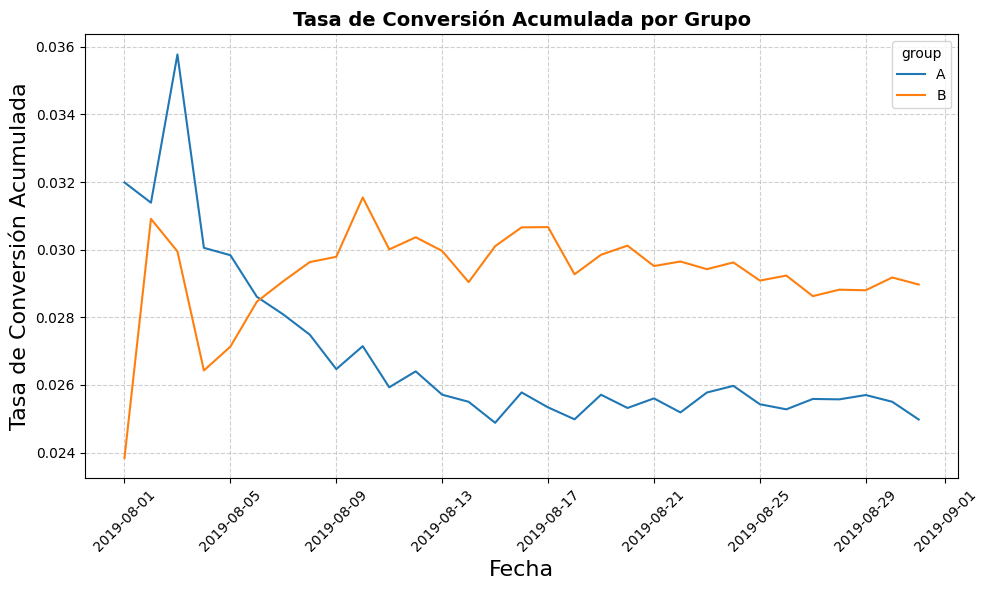

In [25]:
# Calcular la tasa de conversión acumulada
cumulative_data['cumulative_conversion'] = cumulative_data['cumulative_orders'] / cumulative_data['cumulative_visits']

# Gráfico de la tasa de conversión acumulada por grupo
plt.figure(figsize=(10, 6))
sns.lineplot(data=cumulative_data, x='date', y='cumulative_conversion', hue='group')
plt.title('Tasa de Conversión Acumulada por Grupo', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=16)
plt.ylabel('Tasa de Conversión Acumulada', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Observaciónes:

#### Sigue existienvo volatilidad al inicio, sin embargo; a medida que avanza el experimento, las líneas de ambos grupos tienden a aplanarse o estabilizarse, lo que sugiere que la tasa de conversión acumulada se acerca a su valor real para el período del test.

#### Después de la fase inicial, la línea del Grupo B consistentemente se mantiene por encima de la línea del Grupo A. Esto indica que el Grupo B ha tenido una tasa de conversión acumulada más alta durante la mayor parte del Test. Lrecha se Mantiene. La diferencia entre las tasas de conversión acumuladas de los dos grupos parece mantenerse relativamente estable después de los primeros días, con el Grupo B mostrando una ventaja.

#### El gráfico sugiere que el Grupo B tiene una tasa de conversión más alta que el Grupo A. Esto significa que una mayor proporción de visitantes en el Grupo B están realizando un pedido en comparación con el Grupo A y que ademas a diferencia de los gráficos de ingresos y tamaño de pedido promedio, no se observan saltos abruptos o picos importantes en este gráfico de tasa de conversión. Esto podría indicar que la diferencia en la conversión no está siendo fuertemente influenciada por outliers de pedidos individuales de alto valor, sino más bien por un comportamiento de compra más generalizado entre los visitantes.

#### La aparente estabilización de las líneas sugiere que la diferencia en la conversión podría ser estadísticamente significativa. Sin embargo, necesitaremos realizar pruebas estadísticas formales para confirmarlo.

### 3.5 Gráfico de dispersión del número de pedidos por usuario.

--- Número de pedidos por usuario ---


,visitorid,orders_count
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


----------------------------------------------------------------------


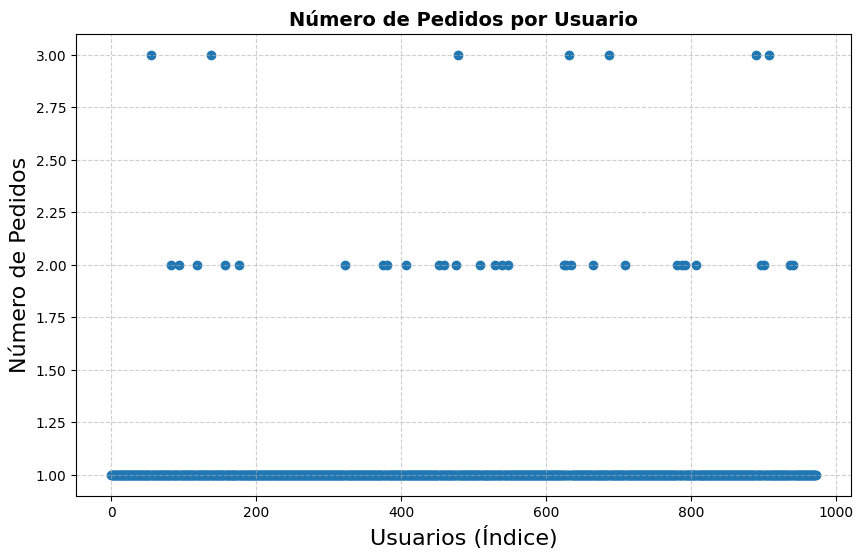

In [27]:
# Calculamos el número de pedidos por usuario
orders_by_user = orders_filtered.groupby('visitorid')['transactionid'].nunique().reset_index()
orders_by_user.columns = ['visitorid', 'orders_count']

# Mostramos las primeras filas del DataFrame de pedidos por usuario
print("--- Número de pedidos por usuario ---")
display(orders_by_user.head())
print('----------------------------------------------------------------------')

# Trazamos el gráfico de dispersión del número de pedidos por usuario
plt.figure(figsize=(10, 6))
plt.scatter(x=orders_by_user.index, y=orders_by_user['orders_count'])
plt.title('Número de Pedidos por Usuario', fontsize=14, fontweight='bold')
plt.xlabel('Usuarios (Índice)', fontsize=16)
plt.ylabel('Número de Pedidos', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Observaciónes:

#### La gran mayoría de los puntos se concentran en la parte inferior del gráfico, alrededor de 1 o 2 pedidos por usuario.
#### Presencia de Outliers: Se observan algunos puntos dispersos significativamente por encima de la concentración principal, con usuarios que han realizado 3, 4, e incluso más pedidos. Estos puntos representan a usuarios con un comportamiento de compra atípico en cuanto a la cantidad de pedidos.
#### El gráfico confirma que la distribución del número de pedidos por usuario está sesgada, con una larga cola hacia la derecha. Los puntos de datos que se alejan significativamente de la mayoría son posibles outliers en términos de la cantidad de pedidos por usuario.
#### Ahora necesitamos definir un umbral basado en percentiles para identificar formalmente qué usuarios consideramos como outliers en términos de número de pedidos.

### 3.6 Calcular los percentiles 95 y 99 del número de pedidos por usuario y definir el punto en el cual un punto de datos se convierte en una anomalía.

In [34]:
# Calculamos el percentil 95 y 99 para el número de pedidos por usuario
percentiles_orders = np.percentile(orders_by_user['orders_count'], [95, 99])

print(f"Percentil 95 del número de pedidos por usuario: {percentiles_orders[0]}")
print(f"Percentil 99 del número de pedidos por usuario: {percentiles_orders[1]}")

# Definimos un umbral para outliers en el número de pedidos
orders_outlier_threshold = int(percentiles_orders[0]) # Usamos el percentil 95 como umbral

print(f"\nUmbral definido para outliers en número de pedidos basado en percentil 95: {orders_outlier_threshold} pedidos")
print(f"Esto significa que los usuarios con más de {orders_outlier_threshold} pedidos serán considerados outliers.")

Percentil 95 del número de pedidos por usuario: 1.0
Percentil 99 del número de pedidos por usuario: 2.0

Umbral definido para outliers en número de pedidos basado en percentil 95: 1 pedidos
Esto significa que los usuarios con más de 1 pedidos serán considerados outliers.


### Observaciónes:
#### Un valor común es usar el percentil 95 o 99 como umbral. Si usamos el percentil 95, consideraremos como outliers a los usuarios que hicieron más pedidos que el 95% de los usuarios; y si usamos el percentil 99, consideraremos como outliers a los usuarios que hicieron más pedidos que el 99% de los usuarios.
#### El umbral específico a usar depende del contexto y de que tan estrictos queramos ser al eliminar los outliers.

#### En base a los resultados el percentíl 95 es 1 Por eso vamos a definir el umbral basado en el percentil 95 para ser un poco menos agresivos.

3.7) Gráfico de dispersión de los precios de los pedidos.

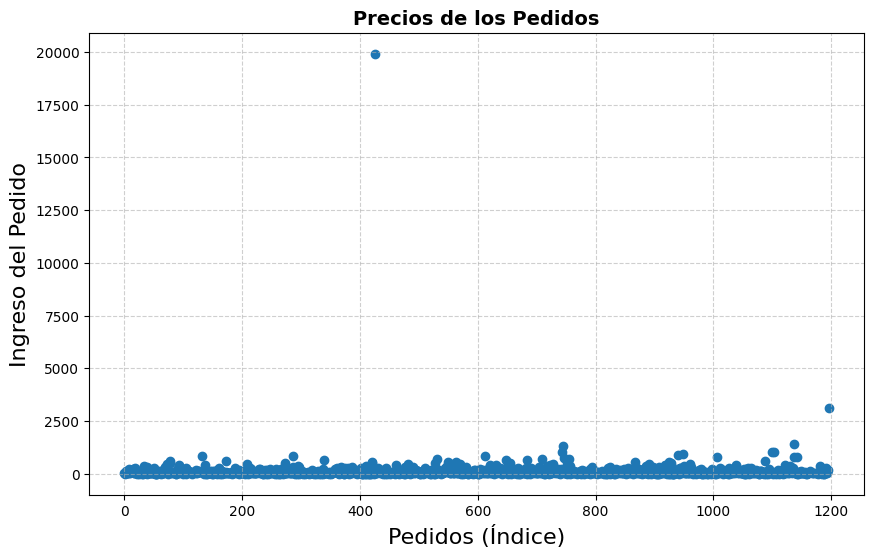

In [30]:
# Trazamos un gráfico de dispersión de los precios de los pedidos
plt.figure(figsize=(10, 6))
# Usamos el índice del DataFrame orders_filtered para el eje x, que representa cada pedido.
plt.scatter(x=orders_filtered.index, y=orders_filtered['revenue'])
plt.title('Precios de los Pedidos', fontsize=14, fontweight='bold')
plt.xlabel('Pedidos (Índice)', fontsize=16)
plt.ylabel('Ingreso del Pedido', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Observaciónes:
#### l gráfico confirma que la distribución de los precios de los pedidos está altamente sesgada, con una larga cola hacia la derecha, hacia valores de ingresos más altos.

#### Los puntos de datos con ingresos muy elevados son claros outliers que necesitan ser considerados en el análisis estadístico; la presencia de estos outliers de ingresos es la razón principal por la que el tamaño de pedido promedio acumulado y el ingreso acumulado del Grupo B mostraron saltos abruptos, si es que estos outliers pertenecen mayormente al Grupo B.

### 3.8 Calcular los percentiles 95 y 99 de los precios de los pedidos.

In [33]:
# Calculamos los percentiles 95 y 99 para los precios de los pedidos
percentiles_revenue = np.percentile(orders_filtered['revenue'], [95, 99])

print(f"Percentil 95 del ingreso del pedido: {percentiles_revenue[0]:.2f}")
print(f"Percentil 99 del ingreso del pedido: {percentiles_revenue[1]:.2f}")

# Definimos un umbral para outliers en el ingreso del pedido
# Al igual que con el número de pedidos, podemos usar el percentil 95 o 99 como umbral.
revenue_outlier_threshold = percentiles_revenue[1]

print(f"\nUmbral definido para outliers en ingreso del pedido basado en percentil 99: {revenue_outlier_threshold:.2f}")
print(f"Esto significa que los pedidos con un ingreso mayor a {revenue_outlier_threshold:.2f} serán considerados outliers.")

Percentil 95 del ingreso del pedido: 414.27
Percentil 99 del ingreso del pedido: 830.30

Umbral definido para outliers en ingreso del pedido basado en percentil 99: 830.30
Esto significa que los pedidos con un ingreso mayor a 830.30 serán considerados outliers.


### 3.9 Significancia estadística de la diferencia en la conversión entre los grupos. Con Outliers

In [38]:
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest # Importamos la función correcta

# Datos para la prueba de significancia estadística de la conversión
# Número de pedidos por grupo
orders_by_group = orders_filtered.groupby('group')['transactionid'].nunique().reset_index()
orders_by_group.columns = ['group', 'orders_count']

# Calculamos Número de visitas por grupo
visits_by_group = visits.groupby('group')['visits'].sum().reset_index()
visits_by_group.columns = ['group', 'visits_count']

# Combinamos los datos de pedidos y visitas por grupo
conversion_data = pd.merge(orders_by_group, visits_by_group, on='group')

# Calculamos el Número de pedidos y visitas para cada grupo
orders_a = conversion_data[conversion_data['group'] == 'A']['orders_count'].iloc[0]
visits_a = conversion_data[conversion_data['group'] == 'A']['visits_count'].iloc[0]

orders_b = conversion_data[conversion_data['group'] == 'B']['orders_count'].iloc[0]
visits_b = conversion_data[conversion_data['group'] == 'B']['visits_count'].iloc[0]

# Calculamos las tasas de conversión
conversion_rate_a = orders_a / visits_a
conversion_rate_b = orders_b / visits_b

print("--- Prueba de significancia estadística para la tasa de Conversión ---")
print(f"Tasa de conversión del Grupo A : {conversion_rate_a:.4f}")
print(f"Tasa de conversión del Grupo B : {conversion_rate_b:.4f}")
print('----------------------------------------------------------------------')

# Realizamos la prueba Z para la diferencia de proporciones
count = np.array([orders_a, orders_b]) # Pedidos
nobs = np.array([visits_a, visits_b]) # Visitas

z_score, p_value = proportions_ztest(count, nobs)

print(f" El P-value de la diferencia en conversión: {p_value:.4f}")

# Definimos el nivel de significancia alpha
alpha = 0.05

# Conclusiónes
if p_value < alpha:
    print(f"El P-value ({p_value:.4f}) es menor que el nivel de significancia ({alpha}).")
    print("Hay una diferencia estadísticamente significativa en la tasa de conversión entre los grupos.")
else:
    print(f"El P-value ({p_value:.4f}) es mayor o igual que el nivel de significancia ({alpha}).")
    print("No hay una diferencia estadísticamente significativa en la tasa de conversión entre los grupos.")

# Mostrar la diferencia relativa en la conversión
relative_conversion_difference = (conversion_rate_b / conversion_rate_a - 1) * 100
print(f"\nDiferencia relativa en la tasa de conversión (Grupo B vs Grupo Ao): {relative_conversion_difference:.2f}%")

--- Prueba de significancia estadística para la tasa de Conversión ---
Tasa de conversión del Grupo A : 0.0250
Tasa de conversión del Grupo B : 0.0290
----------------------------------------------------------------------
 El P-value de la diferencia en conversión: 0.0169
El P-value (0.0169) es menor que el nivel de significancia (0.05).
Hay una diferencia estadísticamente significativa en la tasa de conversión entre los grupos.

Diferencia relativa en la tasa de conversión (Grupo B vs Grupo Ao): 15.98%


### Observaciónes:

#### Los resultados muestran que hay una diferencia estadísticamente significativa en la tasa de conversión entre los grupos, con el Grupo B teniendo una tasa de conversión mayor.

### 3.10 Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos. Con Outliers

In [39]:
# Datos para la prueba de significancia estadística del tamaño promedio de pedido (datos en bruto)
# Separar los datos de ingresos por grupo
revenue_a = orders_filtered[orders_filtered['group'] == 'A']['revenue']
revenue_b = orders_filtered[orders_filtered['group'] == 'B']['revenue']

print("--- Prueba de Significancia Estadística para el Tamaño Promedio de Pedido (Datos en Bruto) ---")

# Realizar la prueba U de Mann-Whitney
# Es una prueba no paramétrica adecuada para comparar dos grupos cuando los datos no siguen una distribución normal
# o contienen outliers, como en el caso de los ingresos/tamaño de pedido.
u_statistic, p_value = st.mannwhitneyu(revenue_a, revenue_b)

print(f"P-value de la diferencia en tamaño promedio de pedido: {p_value:.4f}")

# Definir el nivel de significancia (alpha)
alpha = 0.05

# Conclusión
if p_value < alpha:
    print(f"El P-value ({p_value:.4f}) es menor que el nivel de significancia ({alpha}).")
    print("Hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.")
else:
    print(f"El P-value ({p_value:.4f}) es mayor o igual que el nivel de significancia ({alpha}).")
    print("No hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.")

# Calcular y mostrar la diferencia relativa en el tamaño promedio de pedido
average_order_size_a = revenue_a.mean()
average_order_size_b = revenue_b.mean()

relative_average_order_size_difference = (average_order_size_b / average_order_size_a - 1) * 100
print(f"\nDiferencia relativa en el tamaño promedio de pedido (Grupo B vs Grupo A, con los datos en bruto): {relative_average_order_size_difference:.2f}%")

--- Prueba de Significancia Estadística para el Tamaño Promedio de Pedido (Datos en Bruto) ---
P-value de la diferencia en tamaño promedio de pedido (datos en bruto): 0.8622
Conclusión: El P-value (0.8622) es mayor o igual que el nivel de significancia (0.05).
No hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos.

Diferencia relativa en el tamaño promedio de pedido (Grupo B vs Grupo A, datos en bruto): 27.83%


### Observaciónes:

#### Los resultados muestran que, a pesar de que el tamaño promedio de pedido del Grupo B es visiblemente mayor que el del Grupo A con una diferencia relativa del 27.83%, esta diferencia no es estadísticamente significativa con los datos en bruto, P-value = 0.8622.

#### Esto es un claro indicio de que los outliers que identificamos previamente están inflando el promedio del Grupo B y ocultando o enmascarando la verdadera diferencia entre las distribuciones de los valores de pedido. La prueba U de Mann-Whitney, es menos sensible a estos extremos que una prueba t, lo que explica por qué el p-value es alto.

### 3.11 Significancia estadística de la diferencia en la conversión entre los grupos. Con datos filtrados.

In [45]:
# Identificamos a los usuarios considerados outliers en número de pedidos
users_with_many_orders = orders_filtered.groupby('visitorid')['transactionid'].nunique().reset_index()
outlier_users_orders = users_with_many_orders[users_with_many_orders['transactionid'] > orders_outlier_threshold]['visitorid']

# Identificamos a los usuarios considerados outliers en ingreso del pedido basado en pedidos con ingreso mayor que umbral
outlier_users_revenue = orders_filtered[orders_filtered['revenue'] > revenue_outlier_threshold]['visitorid']

# Combinamos los visitorId de todos los outliers
abnormal_users = pd.concat([outlier_users_orders, outlier_users_revenue], axis=0).unique()

print(f"Número total de usuarios outliers: {len(abnormal_users)}")
print('----------------------------------------------------------------------')

# Filtramos el DataFrame orders_filtered para excluir a estos usuarios outliers
orders_filtered_outliers_removed = orders_filtered[~orders_filtered['visitorid'].isin(abnormal_users)]

# Realizamos la prueba de significancia estadística para la conversión con los datos filtrados

# Número de pedidos por grupo en datos filtrados
orders_by_group_filtered = orders_filtered_outliers_removed.groupby('group')['transactionid'].nunique().reset_index()
orders_by_group_filtered.columns = ['group', 'orders_count_filtered']

# El número de visitas por grupo sigue siendo igual, visits no tiene visitorid para filtrar por usuario outlier
visits_by_group = visits.groupby('group')['visits'].sum().reset_index()
visits_by_group.columns = ['group', 'visits_count']

# Combinamos los datos de pedidos filtrados y visitas por grupo
conversion_data_filtered = pd.merge(orders_by_group_filtered, visits_by_group, on='group')

# Número de pedidos y visitas para cada grupo en datos filtrados
orders_a_filtered = conversion_data_filtered[conversion_data_filtered['group'] == 'A']['orders_count_filtered'].iloc[0]
visits_a_filtered = conversion_data_filtered[conversion_data_filtered['group'] == 'A']['visits_count'].iloc[0]

orders_b_filtered = conversion_data_filtered[conversion_data_filtered['group'] == 'B']['orders_count_filtered'].iloc[0]
visits_b_filtered = conversion_data_filtered[conversion_data_filtered['group'] == 'B']['visits_count'].iloc[0]

# Calculamos las tasas de conversión con datos filtrados
conversion_rate_a_filtered = orders_a_filtered / visits_a_filtered
conversion_rate_b_filtered = orders_b_filtered / visits_b_filtered

print("--- Prueba de Significancia Estadística para la Tasa de Conversión con Datos Filtrados ---")
print(f"Tasa de conversión del Grupo A con datos filtrados: {conversion_rate_a_filtered:.4f}")
print(f"Tasa de conversión del Grupo B con datos filtrados: {conversion_rate_b_filtered:.4f}")
print('----------------------------------------------------------------------')

# Realizamos la prueba Z para la diferencia de proporciones con datos filtrados
count_filtered = np.array([orders_a_filtered, orders_b_filtered])
nobs_filtered = np.array([visits_a_filtered, visits_b_filtered])

z_score_filtered, p_value_filtered = proportions_ztest(count_filtered, nobs_filtered)

print(f"P-value de la diferencia en conversión (datos filtrados): {p_value_filtered:.4f}")

# Definir el nivel de significancia (alpha)
alpha = 0.05

# Conclusión
if p_value_filtered < alpha:
    print(f"Conclusión: El P-value ({p_value_filtered:.4f}) es menor que el nivel de significancia ({alpha}).")
    print("Hay una diferencia estadísticamente significativa en la tasa de conversión entre los grupos con datos filtrados.")
else:
    print(f"Conclusión: El P-value ({p_value_filtered:.4f}) es mayor o igual que el nivel de significancia ({alpha}).")
    print("No hay una diferencia estadísticamente significativa en la tasa de conversión entre los grupos con datos filtrados.")

# Mostrar la diferencia relativa en la conversión con datos filtrados
relative_conversion_difference_filtered = (conversion_rate_b_filtered / conversion_rate_a_filtered - 1) * 100
print(f"\nDiferencia relativa en la tasa de conversión (Grupo B vs Grupo A, datos filtrados): {relative_conversion_difference_filtered:.2f}%")

Número total de usuarios outliers: 45
----------------------------------------------------------------------
--- Prueba de Significancia Estadística para la Tasa de Conversión con Datos Filtrados ---
Tasa de conversión del Grupo A con datos filtrados: 0.0225
Tasa de conversión del Grupo B con datos filtrados: 0.0267
----------------------------------------------------------------------
P-value de la diferencia en conversión (datos filtrados): 0.0082
Conclusión: El P-value (0.0082) es menor que el nivel de significancia (0.05).
Hay una diferencia estadísticamente significativa en la tasa de conversión entre los grupos con datos filtrados.

Diferencia relativa en la tasa de conversión (Grupo B vs Grupo A, datos filtrados): 18.76%


### Observaciones:

#### Diferencia Estadísticamente Significativa Confirmada. Al igual que con los datos en bruto, la prueba con datos filtrados confirma que existe una diferencia estadísticamente significativa en la tasa de conversión entre los grupos. Esto significa que es muy poco probable que la diferencia que vimos se deba simplemente al azar.

#### El Grupo B es Mejor en Conversión; tiene una tasa de conversión mucho mayor que el Grupo A. Esto indica que la variante del Test A/B que se implementó  en el Grupo B fue más efectiva para convertir visitantes en clientes.

#### El hecho de que la conclusión de significancia estadística no cambie después de eliminar los outliers sugiere que la diferencia en la tasa de conversión no estaba siendo fuertemente impulsada o ocultada por los outliers de pedidos de alto valor o usuarios con muchos pedidos.

#### En resumen, el análisis de la tasa de conversión con datos filtrados refuerza la conclusión de que el Grupo B tuvo un rendimiento significativamente mejor en términos de convertir visitantes en compradores durante el Test A/B.

### 3.12 Significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos. Con datos filtrados.

In [47]:
# Datos para la prueba de significancia estadística del tamaño promedio de pedido datos filtrados
# Separamos los datos de ingresos por grupo en el DataFrame filtrado
revenue_a_filtered = orders_filtered_outliers_removed[orders_filtered_outliers_removed['group'] == 'A']['revenue']
revenue_b_filtered = orders_filtered_outliers_removed[orders_filtered_outliers_removed['group'] == 'B']['revenue']

print("--- Prueba de Significancia Estadística para el Tamaño Promedio de Pedido con Datos Filtrados ---")

# Realizamos la prueba U de Mann-Whitney con los datos filtrados
u_statistic_filtered, p_value_filtered_revenue = st.mannwhitneyu(revenue_a_filtered, revenue_b_filtered)

print(f"P-value de la diferencia en tamaño promedio de pedido (datos filtrados): {p_value_filtered_revenue:.4f}")

# Definimos el nivel de significancia alpha
alpha = 0.05

# Conclusiónes
if p_value_filtered_revenue < alpha:
    print(f"El P-value ({p_value_filtered_revenue:.4f}) es menor que el nivel de significancia ({alpha}).")
    print("Hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos con datos filtrados.")
else:
    print(f"El P-value ({p_value_filtered_revenue:.4f}) es mayor o igual que el nivel de significancia ({alpha}).")
    print("No hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos con datos filtrados.")

# Calculamos y mostramos la diferencia relativa en el tamaño promedio de pedido con datos filtrados
average_order_size_a_filtered = revenue_a_filtered.mean()
average_order_size_b_filtered = revenue_b_filtered.mean()

relative_average_order_size_difference_filtered_revenue = (average_order_size_b_filtered / average_order_size_a_filtered - 1) * 100
print(f"\nDiferencia relativa en el tamaño promedio de pedido (Grupo B vs Grupo A, con datos filtrados): {relative_average_order_size_difference_filtered_revenue:.2f}%")

--- Prueba de Significancia Estadística para el Tamaño Promedio de Pedido con Datos Filtrados ---
P-value de la diferencia en tamaño promedio de pedido (datos filtrados): 0.9873
El P-value (0.9873) es mayor o igual que el nivel de significancia (0.05).
No hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre los grupos con datos filtrados.

Diferencia relativa en el tamaño promedio de pedido (Grupo B vs Grupo A, con datos filtrados): 0.17%


### Observaciones:

#### No hay Diferencia Estadísticamente Significativa con datos filtrados: A diferencia de lo que indicaban los gráficos de datos con outliers, la prueba estadística con los datos limpios muestra que no hay una diferencia estadísticamente significativa en el tamaño promedio de pedido entre el Grupo A y el Grupo B. Quiere decir, que es muy probable que la pequeña diferencia observada del 0.17% se deba simplemente al azar y no a un efecto real de la variante del Grupo B en el valor de los pedidos.

#### En síntesis la Prueba con Datos Filtrados es Más confiable. Este resultado recalca la importancia de identificar y manejar bien los outliers. Este análisis con datos filtrados proporciona una imagen mucho más realista y confiable del verdadero impacto de la variante del Test A/B en el tamaño de pedido promedio.

# Optimización de Ingresos: Priorización Estratégica y Validación Estadística de un Test A/B en E-commerce

## Descripción del Proyecto

Este proyecto tiene como objetivo principal mejorar los ingresos de una plataforma de comercio electrónico mediante dos enfoques complementarios: la **priorización estratégica de hipótesis de crecimiento** y el **análisis estadístico de un Test A/B** ya ejecutado.

La primera parte utiliza los frameworks **RICE e ICE** para evaluar y clasificar nueve hipótesis de crecimiento basadas en su alcance, impacto, confianza y esfuerzo, con el fin de identificar las iniciativas con mayor potencial de retorno.

La segunda parte se centra en el análisis de un Test A/B, explorando métricas clave como el ingreso acumulado, el tamaño de pedido promedio y la tasa de conversión. Se realiza una detección y tratamiento de anomalías (outliers) para asegurar la fiabilidad del análisis estadístico, que culmina en pruebas de significancia para determinar si las diferencias observadas entre los grupos experimental y de control son estadísticamente significativas.

El resultado final es una recomendación basada en datos para la implementación de mejoras y la toma de decisiones estratégicas.

## Datos

Se utilizan tres conjuntos de datos:

1.  `hypotheses_us.csv`: Contiene las nueve hipótesis de crecimiento con sus métricas (Reach, Impact, Confidence, Effort).
2.  `orders_us.csv`: Contiene información sobre los pedidos realizados durante el Test A/B (ID de transacción, ID de usuario, fecha, ingresos, grupo A/B).
3.  `visits_us.csv`: Contiene el número de visitas diarias para cada grupo del Test A/B.

## Metodología

1.  **Priorización de Hipótesis:**
    *   Cálculo y comparación de las puntuaciones ICE y RICE para cada hipótesis.
    *   Análisis del impacto del factor 'Reach' en la priorización.
    *   Determinación de las hipótesis con mayor prioridad según el framework RICE.

2.  **Análisis del Test A/B:**
    *   Preprocesamiento de datos, incluyendo la verificación y manejo de usuarios en ambos grupos.
    *   Exploración y visualización de métricas acumuladas (ingresos, tamaño de pedido promedio, tasa de conversión).
    *   Identificación de outliers en el número de pedidos por usuario y en el valor de los pedidos.
    *   Análisis de significancia estadística de la diferencia en la tasa de conversión (con datos brutos y filtrados).
    *   Análisis de significancia estadística de la diferencia en el tamaño promedio de pedido (con datos brutos y filtrados).
    *   Toma de decisión basada en los resultados estadísticos.

## Estructura del Repositorio

*   `README.md`: Este archivo.
*   `notebook.ipynb`: El cuaderno de Jupyter/Colab con todo el código y análisis.
*   `hypotheses_us.csv`: Archivo de datos de hipótesis.
*   `orders_us.csv`: Archivo de datos de pedidos del Test A/B.
*   `visits_us.csv`: Archivo de datos de visitas del Test A/B.

## Conclusiones Clave y Recomendaciones

*   La priorización utilizando el framework RICE, que considera el alcance, identificó hipótesis con mayor potencial de impacto general en comparación con ICE.
*   El análisis del Test A/B reveló que el Grupo B tuvo una tasa de conversión significativamente mayor que el Grupo A, incluso después de eliminar outliers.
*   Aunque el Grupo B mostró un tamaño promedio de pedido mayor en los datos brutos, este efecto no fue estadísticamente significativo cuando se eliminaron los outliers de altos ingresos.
*   **Decisión:** Basado en la mejora estadísticamente significativa en la tasa de conversión, se recomienda **detener el Test A/B y escalar la solución implementada en el Grupo B**.

Este proyecto demuestra la importancia de una priorización estratégica y un análisis estadístico riguroso, incluyendo el manejo de anomalías, para tomar decisiones basadas en datos que impulsen el crecimiento y los ingresos.

### 3.13 Decisiones basadas en los resultados de la prueba A/B.

#### El objetivo principal de un Test A/B generalmente es identificar una variante que mejora las métricas clave del negocio, y en este analisis hemos encontrado una mejora estadísticamente significativa en la tasa de conversión, sin un impacto negativo significativo en el tamaño promedio de pedido; entonces, podemos tomar la siguiente decisión:

#### Decisión: Detener el Test A/B y considerar la variante del Grupo B como ganadora en términos de tasa de conversión. Recomendaríamos escalar la solución implementada en el Grupo B a toda la audiencia.

## Conclusión:

### **Análisis de Datos Brutos y Acumulados:**
Los gráficos de ingreso acumulado y tamaño de pedido promedio acumulado mostraron una aparente ventaja para el Grupo B, pero con picos notables que sugerían la presencia de outliers.
El gráfico de diferencia relativa en el tamaño de pedido promedio acumulado visualizó claramente el impacto de estos picos.
El gráfico de tasa de conversión acumulada mostró que el Grupo B tuvo una tasa de conversión consistentemente más alta que el Grupo A, sin los picos evidentes de los gráficos de ingresos.
### **Identificación de Outliers:**
Identificamos outliers tanto en el número de pedidos por usuario (usuarios con más de 1 pedido basado en el percentil 95) como en el valor de los pedidos (pedidos con ingresos superiores a 830.30 basado en el percentil 99).
### **Análisis de Significancia Estadística (Datos Brutos):**
Tasa de Conversión: Encontramos una diferencia estadísticamente significativa en la tasa de conversión entre los grupos. El Grupo B tuvo una tasa de conversión significativamente mayor.
Tamaño Promedio de Pedido: No encontramos una diferencia estadísticamente significativa en el tamaño promedio de pedido. Esto, junto con los gráficos, sugirió fuertemente la influencia de outliers.
### **Análisis de Significancia Estadística (Datos Filtrados - Outliers Eliminados):**
Tasa de Conversión: Incluso después de eliminar los outliers, la diferencia en la tasa de conversión sigue siendo estadísticamente significativa. El Grupo B mantiene una tasa de conversión significativamente mayor que el Grupo A (con una diferencia relativa incluso ligeramente mayor).
Tamaño Promedio de Pedido: Después de eliminar los outliers, la diferencia en el tamaño promedio de pedido entre los grupos no es estadísticamente significativa. La diferencia relativa en las medias se vuelve casi nula. Esto confirma que los outliers fueron los responsables de inflar artificialmente el tamaño promedio de pedido del Grupo B en los datos brutos.

## Conclusión Final:

### Este análisis ha proporcionado una guía estratégica dual: primero, al priorizar hipótesis de crecimiento usando el framework RICE, identificamos que iniciativas tienen el mayor potencial de impacto general, dirigiendo eficientemente los recursos de desarrollo.
### Segundo, el análisis riguroso del Test A/B, que incluyó la identificación y manejo de anomalías o outliers, demostró estadísticamente que la variante del Grupo B mejoró significativamente la tasa de conversión. Aunque no hubo un impacto significativo en el tamaño de pedido promedio una vez controlados los outliers, la clara mejora en la conversión justifica la implementación de la solución del Grupo B a una mayor escala.

### En conjunto, hemos ofrecido al negocio una dirección clara sobre dónde puede enfocar sus esfuerzos futuros para maximizar el crecimiento y una validación estadística para escalar una mejora probada, lo que se traducirá directamente en un aumento en el número de pedidos y, por ende, en los ingresos.

# Revenue Optimization: Strategic Prioritization and Statistical Validation of an E-commerce A/B Test

## Project Description

This project aims to improve revenue on an e-commerce platform through two complementary approaches: **strategic prioritization of growth hypotheses** and **statistical analysis of an already executed A/B Test**.

The first part uses the **RICE and ICE** frameworks to evaluate and rank nine growth hypotheses based on their Reach, Impact, Confidence, and Effort, in order to identify the initiatives with the highest potential return.

The second part focuses on analyzing an A/B Test, exploring key metrics such as cumulative revenue, cumulative average order size, and conversion rate. Anomaly detection and treatment (outliers) are performed to ensure the reliability of the statistical analysis, which culminates in significance tests to determine if the observed differences between the experimental and control groups are statistically significant.

The final outcome is a data-driven recommendation for implementing improvements and making strategic decisions.

## Data

Three datasets are used:

1.  `hypotheses_us.csv`: Contains the nine growth hypotheses with their metrics (Reach, Impact, Confidence, Effort).
2.  `orders_us.csv`: Contains information about orders placed during the A/B Test (transaction ID, user ID, date, revenue, A/B group).
3.  `visits_us.csv`: Contains the daily number of visits for each A/B Test group.

## Methodology

1.  **Hypothesis Prioritization:**
    *   Calculation and comparison of ICE and RICE scores for each hypothesis.
    *   Analysis of the impact of the 'Reach' factor on prioritization.
    *   Determination of the hypotheses with the highest priority according to the RICE framework.

2.  **A/B Test Analysis:**
    *   Data preprocessing, including checking for and handling users in both groups.
    *   Exploration and visualization of cumulative metrics (revenue, average order size, conversion rate).
    *   Identification of outliers in the number of orders per user and in the order value.
    *   Statistical significance analysis of the difference in conversion rate (with raw and filtered data).
    *   Statistical significance analysis of the difference in average order size (with raw and filtered data).
    *   Decision making based on the test results.

## Repository Structure

*   `README.md`: This file.
*   `notebook.ipynb`: The Jupyter/Colab notebook with all the code and analysis.
*   `hypotheses_us.csv`: Hypotheses data file.
*   `orders_us.csv`: A/B Test orders data file.
*   `visits_us.csv`: A/B Test visits data file.

## Key Conclusions and Recommendations

*   Prioritization using the RICE framework, which considers reach, identified hypotheses with greater overall impact potential compared to ICE.
*   The A/B Test analysis revealed that Group B had a significantly higher conversion rate than Group A, even after removing outliers.
*   Although Group B showed a higher average order size in the raw data, this effect was not statistically significant when high-revenue outliers were removed.
*   **Decision:** Based on the statistically significant improvement in conversion rate, it is recommended to **stop the A/B Test and scale the solution implemented in Group B**.

This project demonstrates the importance of strategic prioritization and rigorous statistical analysis, including anomaly handling, to make data-driven decisions that drive growth and revenue.